### Environment Setup

In [1]:
import pandas as pd
import datetime
import yfinance as yf
import backtrader as bt
import numpy as np
import warnings
import riskfolio as rp
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
from Data_Preprocess import IAM_data_setup, download_IAM, SelectIndex, generate_interval
from Data_Preprocess import calculate_returns, calculate_date_range

### Different Ticker sets from US and Hong Kong among equity/Bond, etc

In [3]:
def sample_markets(i):
    # Tickers of assets
    stocks_=[]
    sector_=[]
    class_=[]
    # 0 selection
    stocks_.append( ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
              'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
              'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA',
               ])
    sector_.append(['Consumer Discretionary','Consumer Discretionary',
                                  'Consumer Discretionary', 'Consumer Staples',
                                  'Consumer Staples','Energy','Financials',
                                  'Financials','Financials','Financials',
                                  'Health Care','Health Care','Industrials','Industrials',
                                  'Industrials','Health Care','Industrials',
                                  'Information Technology','Information Technology',
                                  'Materials','Telecommunications Services','Utilities',
                                  'Utilities','Telecommunications Services','Financials',
                    ])
    class_.append([
                'Equity','Equity','Equity','Equity','Equity',
                'Equity','Equity','Equity','Equity','Equity',
                'Equity','Equity','Equity','Equity','Equity',
                'Equity','Equity','Equity','Equity','Equity',
                'Equity','Equity','Equity','Equity','Equity',
                ])
   # 1 selection
    stocks_.append(['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
                  'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
                  'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA',
                    'HYG','LQD','TLT'
                  ])
    sector_.append(['Consumer Discretionary','Consumer Discretionary',
                      'Consumer Discretionary', 'Consumer Staples',
                      'Consumer Staples','Energy','Financials',
                      'Financials','Financials','Financials',
                      'Health Care','Health Care','Industrials','Industrials',
                      'Industrials','Health Care','Industrials',
                      'Information Technology','Information Technology',
                      'Materials','Telecommunications Services','Utilities',
                      'Utilities','Telecommunications Services','Financials',
                         'Corporate','Corporate','Treasury',
                    ])
    class_.append([
                    'Equity','Equity','Equity','Equity','Equity',
                    'Equity','Equity','Equity','Equity','Equity',
                    'Equity','Equity','Equity','Equity','Equity',
                    'Equity','Equity','Equity','Equity','Equity',
                    'Equity','Equity','Equity','Equity','Equity',
                   'Fixed Income','Fixed Income','Fixed Income', 
                ])
    # 2 selection
    stocks_.append([
                    'AMAT', 'AMD','AVGO',  
                    'BAC','BKR','BMY','BSX',
                    'C','CMCSA',
                    'CSCO','CSX','CVS','CVX',
                    'DIS','DVN',
                    'FCX','FNF','GEN','GILD',
                    'GM','HAL','HPQ','INTC',
                    'IPG','JNJ','KDP',
                    'KKR','KMI','KO',
                    'MDLZ','MO','MRK','MRO',
                    'MRVL','MSFT','MU','NEM',
                ])
    
    sector_.append([
                    'Technology','Technology','Technology',
                    'Financial Services','Energy','Healthcare','Healthcare',
                    'Financial Services','Communication Services',
                    'Technology','Industrials','Healthcare','Energy',
                    'Communication Services','Energy',
                    'Basic Materials','Financial Services','Technology','Healthcare',
                    'Consumer Cyclical','Energy','Technology','Technology',
                    'Communication Services','Healthcare','Consumer Defensive',
                    'Financial Services','Energy','Consumer Defensive',
                    'Consumer Defensive','Consumer Defensive','Healthcare','Energy',
                    'Technology','Technology','Technology','Basic Materials',
            ])
    class_.append([
                    'Equity', 'Equity','Equity',  
                    'Equity','Equity','Equity','Equity',
                    'Equity','Equity',
                    'Equity','Equity','Equity','Equity',
                    'Equity','Equity',
                    'Equity','Equity','Equity','Equity',
                    'Equity','Equity','Equity','Equity',
                    'Equity','Equity','Equity',
                    'Equity','Equity','Equity',
                    'Equity','Equity','Equity','Equity',
                    'Equity','Equity','Equity','Equity',
                ])

    ETF_BOND = ['HYG','LQD','TLT',
               ]
    industry_BOND = ['Bond','Bond','Bond',
                    ]
    
    ETF_COMM = [
        'DBA','GLD','SLV','XLE','XME','XOP',
    ]
    
    industry_COMM=[
        'Commodity','Commodity','Commodity','Commodity','Commodity','Commodity',
    ]
    
    ETF_list = ['HYG','LQD','TLT',
               'DBA',
               'GLD','SLV','XLE','XME','XOP',
                'XBI',
                'EFA','EWW','EWZ',
                'VNQ','XHB',
                'IWM','QQQ']
    type_etf =  ['Bond','Bond','Bond',
                   'Commodity',
                   'Commodity','Commodity','Commodity','Commodity','Commodity',
                   'Healthcare',
                   'International','International','International',
                   'Real Estate','Real Estate',
                   'US Major','US Major',
                   ]
    industry_etf =  ['Corporate','Corporate','Treasury',
                   'Agriculture',
                   'Metal','Metal','Energy','Metal','ETF',
                   'Healthcare',
                   'International','International','International',
                   'Real Estate','Real Estate',
                   'US Major','US Major',
                   ]

    
    if i=="IAM":
        return IAM_data_setup()

    if i=="IAMHKD":
        a, df = IAM_data_setup()
        df = df[df['Currency']=='HKD']
        return df.Assets.to_list(), df
     
    if i=="IAMUSD":
        a, df = IAM_data_setup()
        df = df[df['Currency']=='USD']
        return df.Assets.to_list(), df
        
    assets = stocks_[i]
    asset_classes_dict = {'Assets': assets,  
                     'Class': class_[i],
                     'Sector': sector_[i],
                    }
    
    asset_classes = pd.DataFrame(asset_classes_dict)
    asset_classes = asset_classes.sort_values(by=['Assets'])
    asset_classes['Currency'] = "USD"
    asset_classes['Rate'] = 1.0
    
    assets.sort()

    return assets, asset_classes

### Parameters Setup

In [4]:
# Date range
start = '2013-01-01'
end = '2024-09-30'

# assets_selection = "IAM"
# assets_selection = "IAMUSD"
# assets_selection = 2
assets_selection = "IAMHKD"
constraints_selection = 5

assets, asset_classes = sample_markets(assets_selection)

display(asset_classes['Sector'].unique())
display(asset_classes['Class'].unique())

array(['Consumer Defensive', 'Real Estate', 'Industrials', 'Technology',
       'Energy', 'Consumer Cyclical', 'Cash'], dtype=object)

array(['Equity', 'Commodity', 'Cash'], dtype=object)

In [5]:
print(f"** Number of assets:{len(assets)} ** \n")
print(assets)
print(f"\n ** Asset Classes Shape: {asset_classes.shape} **")
display(asset_classes)

** Number of assets:9 ** 

['0341.HK', '0405.HK', '0737.HK', '1186.HK', '1810.HK', '3175.HK', '3187.HK', '9988.HK', '0P0001Q45W.HK']

 ** Asset Classes Shape: (9, 6) **


,Assets,Class,Sector,Type,Currency,Rate
0,0341.HK,Equity,Consumer Defensive,Stock,HKD,0.128205
1,0405.HK,Equity,Real Estate,RIT,HKD,0.128205
2,0737.HK,Equity,Industrials,Stock,HKD,0.128205
15,1186.HK,Equity,Industrials,Stock,HKD,0.128205
16,1810.HK,Equity,Technology,Stock,HKD,0.128205
17,3175.HK,Commodity,Energy,ETF,HKD,0.128205
18,3187.HK,Equity,Real Estate,ETF,HKD,0.128205
19,9988.HK,Equity,Consumer Cyclical,Stock,HKD,0.128205
55,0P0001Q45W.HK,Cash,Cash,Fund,HKD,0.128205


In [6]:
plotFlag = True
useConstraint = True
useView = True

# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

# rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
#        'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']
rms = ['MV','WR','CVaR']

# Objective Functions 
objectives = ['Sharpe', 'MinRisk', 'MaxRet']
# objectives = [ 'MaxRet']

# rebalance interval: Monthly, Quarterly, Semiannually
# reb_interval = ["M","Q","S"]
reb_interval = ["Q"]

### Setup constraints and Views

In [7]:
###########################################################
# Building Constraints
############################################################
def Gen_Constraints():
    constraints = []
    constraints.append(pd.DataFrame({'Disabled': [False, True, False,False,True],
                   'Type': ['All Assets', 'All Classes', 'Classes','Classes','All Assets'],
                   'Set': ['', 'Sector', 'Class','Class',''],
                   'Position': ['', '', 'Equity','Fixed Income',''],
                   'Sign': ['<=', '<=', '<=','<=','>='],
                   'Weight': [0.10, 0.20, 0.6, 0.4, 0.02],
                   'Type Relative': ['', '', '','',''],
                   'Relative Set': ['', '', '','',''],
                   'Relative': ['', '', '','',''],
                   'Factor': ['', '', '','','']}))
    
    constraints.append(pd.DataFrame({'Disabled': [False, False,False],
                   'Type': ['All Assets', 'Classes','Classes'],
                   'Set': ['', 'Class','Class'],
                   'Position': ['', 'Equity','Fixed Income'],
                   'Sign': ['<=', '<=','<='],
                   'Weight': [0.10, 0.6, 0.4],
                   'Type Relative': ['', '', ''],
                   'Relative Set': ['', '', ''],
                   'Relative': ['', '', ''],
                   'Factor': ['', '', '']}))
    
    constraints.append(pd.DataFrame({'Disabled': [False, False, False],
                   'Type': ['All Assets', 'All Classes', 'All Classes'],
                   'Set': ['', 'Sector', 'Sector'],
                   'Position': ['', '', ''],
                   'Sign': ['<=', '<=', '>='],
                   'Weight': [0.10, 0.20, 0.03],
                   'Type Relative': ['', '', ''],
                   'Relative Set': ['', '', ''],
                   'Relative': ['', '', ''],
                   'Factor': ['', '', '']}))
    
    constraints.append(pd.DataFrame({'Disabled': [False],
                   'Type': ['All Assets'],
                   'Set': [''],
                   'Position': [''],
                   'Sign': ['<='],
                   'Weight': [0.10],
                   'Type Relative': [''],
                   'Relative Set': [''],
                   'Relative': [''],
                   'Factor': ['']
                  }))

    constraints.append(pd.DataFrame({'Disabled': [False],
                   'Type': ['All Assets'],
                   'Set': [''],
                   'Position': [''],
                   'Sign': ['<='],
                   'Weight': [0.15],
                   'Type Relative': [''],
                   'Relative Set': [''],
                   'Relative': [''],
                   'Factor': ['']
                  }))

    constraints.append(pd.DataFrame({'Disabled': [False],
                   'Type': ['All Assets'],
                   'Set': [''],
                   'Position': [''],
                   'Sign': ['<='],
                   'Weight': [0.25],
                   'Type Relative': [''],
                   'Relative Set': [''],
                   'Relative': [''],
                   'Factor': ['']
                  }))
    
    return constraints

global_constraint_list = Gen_Constraints()
max_g_const = len(global_constraint_list)
print(f"Total {max_g_const} constraints for selection")
constraints = global_constraint_list[constraints_selection]
display("Current selected constraints:")
display(constraints)

Total 6 constraints for selection


'Current selected constraints:'

,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative,Factor
0,False,All Assets,,,<=,0.25,,,,


In [8]:
############################################################
# Building View for Black Litterman
############################################################
views = {'Disabled': [False, False, False],
         'Type': ['Classes', 'Classes', 'Classes'],
         'Set': ['Sector', 'Sector', 'Sector'],
         'Position': ['Technology', 'Energy', 'Healthcare'],
         'Sign': ['>=', '>=', '>='],
         'Weight': [0.20, 0.1, 0.09], # Annual terms 
         'Type Relative': ['Classes', 'Classes', 'Classes'],
         'Relative Set': ['Sector', 'Sector', 'Sector'],
         'Relative': ['Financial Services', 'Commodity', 'Consumer Defensive']}

views = pd.DataFrame(views)

display(views)

,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative
0,False,Classes,Sector,Technology,>=,0.20,Classes,Sector,Financial Services
1,False,Classes,Sector,Energy,>=,0.10,Classes,Sector,Commodity
2,False,Classes,Sector,Healthcare,>=,0.09,Classes,Sector,Consumer Defensive


In [9]:
# Methods to create Constraint and Views by a subset of tickers

def get_Constraint(subSet):
    sub_asset_classes = asset_classes.loc[asset_classes['Assets'].isin(subSet)]
    # print(f'Constraint-> subSet={subSet}, sub_asset_classes={sub_asset_classes}\n')
    return rp.assets_constraints(constraints, sub_asset_classes)


def get_Views(subSet):
    sub_asset_classes = asset_classes.loc[asset_classes['Assets'].isin(subSet)]
    # print(f'subSet={subSet}, sub_asset_classes={sub_asset_classes}\n')
    return rp.assets_views(views, sub_asset_classes)
    

### Download Data
Full data download from yfinance to **prices** dataframe

In [10]:
# Downloading data
print('# of assets: ', len(assets))
if (type(assets_selection)==str) and ("IAM" in assets_selection) :
    prices = download_IAM()
else:
    prices = yf.download(assets, start=start, end=end)

# of assets:  9


In [11]:
print('Data Size: ', prices.shape)
prices.columns[prices.isna().sum()==prices.shape[0]]

Data Size:  (3029, 336)


MultiIndex([], names=['Price', 'Ticker'])

In [12]:
display(prices.index[0], prices.index[-1])
display(prices.info())
display(prices.head())

Timestamp('2013-01-02 00:00:00+0000', tz='UTC')

Timestamp('2024-09-26 00:00:00+0000', tz='UTC')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3029 entries, 2013-01-02 00:00:00+00:00 to 2024-09-26 00:00:00+00:00
Columns: 336 entries, ('Adj Close', '0341.HK') to ('Volume', 'ZM')
dtypes: float64(336)
memory usage: 7.8 MB


None

Price                      Adj Close                                 \
Ticker                       0341.HK   0405.HK   0737.HK 0P00001DU6   
Date                                                                  
2013-01-02 00:00:00+00:00  15.271100  1.645047  2.033266        NaN   
2013-01-03 00:00:00+00:00  15.376174  1.649469  2.042636        NaN   
2013-01-04 00:00:00+00:00  15.341152  1.649469  2.037952        NaN   
2013-01-07 00:00:00+00:00  15.341152  1.689269  2.061376        NaN   
2013-01-08 00:00:00+00:00  15.446228  1.680424  2.052006        NaN   

Price                                                                    \
Ticker                    0P00002C5C 0P00006OXK.T 0P0000UIC0 0P0000VP5F   
Date                                                                      
2013-01-02 00:00:00+00:00        NaN          NaN        NaN        NaN   
2013-01-03 00:00:00+00:00        NaN          NaN        NaN        NaN   
2013-01-04 00:00:00+00:00        NaN          NaN        NaN        NaN   
2013-01-07 00:00:00+00:00        NaN          NaN        NaN        NaN   
2013-01-08 00:00:00+00:00        NaN          NaN        NaN        NaN   

Price                                            ...     Volume         \
Ticker                    0P0000YVJG 0P0000Z5AZ  ...     IWRD.L JDN.MX   
Date                                             ...                     
2013-01-02 00:00:00+00:00        NaN        NaN  ...   502324.0    NaN   
2013-01-03 00:00:00+00:00        NaN        NaN  ...   190327.0    NaN   
2013-01-04 00:00:00+00:00        NaN        NaN  ...  1066404.0    NaN   
2013-01-07 00:00:00+00:00        NaN        NaN  ...   716990.0    NaN   
2013-01-08 00:00:00+00:00        NaN        NaN  ...   712517.0    NaN   

Price                                                                          \
Ticker                       LQDE.L METV PAVE SDHY.L       SHV TFLO       USO   
Date                                                                            
2013-01-02 00:00:00+00:00   22658.0  NaN  NaN    NaN  259200.0  NaN  693100.0   
2013-01-03 00:00:00+00:00   71159.0  NaN  NaN    NaN  357500.0  NaN  489425.0   
2013-01-04 00:00:00+00:00   80771.0  NaN  NaN    NaN  303100.0  NaN  742613.0   
2013-01-07 00:00:00+00:00   54127.0  NaN  NaN    NaN  288400.0  NaN  356675.0   
2013-01-08 00:00:00+00:00  141965.0  NaN  NaN    NaN  140900.0  NaN  480188.0   

Price                          
Ticker                     ZM  
Date                           
2013-01-02 00:00:00+00:00 NaN  
2013-01-03 00:00:00+00:00 NaN  
2013-01-04 00:00:00+00:00 NaN  
2013-01-07 00:00:00+00:00 NaN  
2013-01-08 00:00:00+00:00 NaN  

[5 rows x 336 columns]

In [13]:
############################################################
# Calculate assets returns
############################################################

returns = calculate_returns(prices)[assets]
print(f"** Number of assets in returns DF: {returns.shape[1]} **")
print(f"** days of assets in returns DF: {returns.shape[0]} **")
print(f"** begin date: {returns.index[0]}, last date: {returns.index[-1]} **")
print("\n** Assets in Returns Set: ", returns.columns.to_list(), " \n")
display(returns)
returns.reset_index().to_csv("Full_Returns.csv", index=False)

** Number of assets in returns DF: 9 **
** days of assets in returns DF: 3029 **
** begin date: 2013-01-02 00:00:00+00:00, last date: 2024-09-26 00:00:00+00:00 **

** Assets in Returns Set:  ['0341.HK', '0405.HK', '0737.HK', '1186.HK', '1810.HK', '3175.HK', '3187.HK', '9988.HK', '0P0001Q45W.HK']  



,0341.HK,0405.HK,0737.HK,1186.HK,1810.HK,3175.HK,3187.HK,9988.HK,0P0001Q45W.HK
Date,,,,,,,,,
2013-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03 00:00:00+00:00,0.0069,0.0027,0.0046,-0.0201,NaN,NaN,NaN,NaN,NaN
2013-01-04 00:00:00+00:00,-0.0023,0.0000,-0.0023,0.0445,NaN,NaN,NaN,NaN,NaN
2013-01-07 00:00:00+00:00,0.0000,0.0241,0.0115,0.0011,NaN,NaN,NaN,NaN,NaN
2013-01-08 00:00:00+00:00,0.0068,-0.0052,-0.0045,-0.0087,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-09-20 00:00:00+00:00,0.0000,0.0000,0.0000,0.0023,0.0040,-0.0008,-0.0228,0.0175,0.0001
2024-09-23 00:00:00+00:00,-0.0026,-0.0206,0.0137,0.0158,0.0337,0.0038,-0.0140,-0.0052,0.0003
2024-09-24 00:00:00+00:00,0.0039,0.0316,0.0000,0.0401,0.0316,0.0068,0.0065,0.0605,0.0001


In [14]:
#  all test is from the 1004th day and finish at the last testdata day.
#
start_test = 1004
end_test = prices.shape[0] - 1
test_size = 1000
print(f" Testing data from {start_test} to {end_test}")

 Testing data from 1004 to 3028


In [15]:
#
# from the full pricess datafraes, create the intercepted date/index for each ticker
#
assets_dt_range = calculate_date_range(prices, returns.columns.to_list())

Process 0341.HK


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2013-01-02 00:00:00+00:00,15.271100,21.799999,22.15,21.700001,22.000000,1298000.0
2013-01-03 00:00:00+00:00,15.376174,21.950001,22.00,21.850000,21.950001,246000.0
2013-01-04 00:00:00+00:00,15.341152,21.900000,22.00,21.900000,21.950001,396000.0
2013-01-07 00:00:00+00:00,15.341152,21.900000,22.10,21.850000,21.950001,148000.0
2013-01-08 00:00:00+00:00,15.446228,22.049999,22.15,21.850000,21.850000,260000.0
...,...,...,...,...,...,...
2024-09-20 00:00:00+00:00,7.750000,7.750000,7.82,7.720000,7.740000,1075001.0
2024-09-23 00:00:00+00:00,7.730000,7.730000,7.78,7.690000,7.750000,493203.0
2024-09-24 00:00:00+00:00,7.760000,7.760000,7.79,7.690000,7.780000,1246000.0


Process 0405.HK


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2013-01-02 00:00:00+00:00,1.645047,3.677888,3.687774,3.638340,3.638340,8265569.0
2013-01-03 00:00:00+00:00,1.649469,3.687774,3.687774,3.668001,3.677888,7148539.0
2013-01-04 00:00:00+00:00,1.649469,3.687774,3.697661,3.668001,3.687774,7226193.0
2013-01-07 00:00:00+00:00,1.689269,3.776756,3.806416,3.697661,3.697661,17962684.0
2013-01-08 00:00:00+00:00,1.680424,3.756982,3.796529,3.737208,3.776756,9059890.0
...,...,...,...,...,...,...
2024-09-20 00:00:00+00:00,0.970000,0.970000,0.980000,0.960000,0.970000,2558049.0
2024-09-23 00:00:00+00:00,0.950000,0.950000,0.970000,0.950000,0.970000,1925637.0
2024-09-24 00:00:00+00:00,0.980000,0.980000,0.980000,0.960000,0.960000,2636255.0


Process 0737.HK


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2013-01-02 00:00:00+00:00,2.033266,4.34,4.37,4.30,4.31,1843160.0
2013-01-03 00:00:00+00:00,2.042636,4.36,4.37,4.33,4.34,2132180.0
2013-01-04 00:00:00+00:00,2.037952,4.35,4.37,4.34,4.35,1893644.0
2013-01-07 00:00:00+00:00,2.061376,4.40,4.42,4.34,4.36,3520844.0
2013-01-08 00:00:00+00:00,2.052006,4.38,4.40,4.37,4.40,2658400.0
...,...,...,...,...,...,...
2024-09-20 00:00:00+00:00,1.834776,1.92,1.94,1.90,1.93,387400.0
2024-09-23 00:00:00+00:00,1.860000,1.86,1.88,1.81,1.88,111781.0
2024-09-24 00:00:00+00:00,1.860000,1.86,1.89,1.83,1.86,301250.0


Process 1186.HK


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2013-01-02 00:00:00+00:00,5.835953,8.95,9.00,8.83,8.88,13887654.0
2013-01-03 00:00:00+00:00,5.718582,8.77,9.07,8.73,9.05,15423260.0
2013-01-04 00:00:00+00:00,5.972886,9.16,9.32,8.78,8.83,39693926.0
2013-01-07 00:00:00+00:00,5.979407,9.17,9.40,9.16,9.20,16565000.0
2013-01-08 00:00:00+00:00,5.927241,9.09,9.36,9.02,9.20,12541051.0
...,...,...,...,...,...,...
2024-09-20 00:00:00+00:00,4.420000,4.42,4.43,4.38,4.41,4094500.0
2024-09-23 00:00:00+00:00,4.490000,4.49,4.49,4.42,4.44,8476696.0
2024-09-24 00:00:00+00:00,4.670000,4.67,4.68,4.49,4.49,14267000.0


Process 1810.HK


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2018-07-09 00:00:00+00:00,16.799999,16.799999,17.000000,16.000000,16.600000,462182642.0
2018-07-10 00:00:00+00:00,19.000000,19.000000,19.340000,17.000000,17.000000,534072218.0
2018-07-11 00:00:00+00:00,19.000000,19.000000,19.799999,18.299999,18.500000,374721138.0
2018-07-12 00:00:00+00:00,19.260000,19.260000,19.700001,19.020000,19.400000,132592630.0
2018-07-13 00:00:00+00:00,21.450001,21.450001,21.799999,19.520000,19.600000,364065075.0
...,...,...,...,...,...,...
2024-09-20 00:00:00+00:00,19.879999,19.879999,20.200001,19.719999,19.799999,134110539.0
2024-09-23 00:00:00+00:00,20.549999,20.549999,20.799999,19.840000,19.879999,196007468.0
2024-09-24 00:00:00+00:00,21.200001,21.200001,21.450001,20.799999,20.900000,231382970.0


Process 3175.HK


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2016-04-28 00:00:00+00:00,12.1989,12.1989,12.1989,12.1989,12.1989,0.0
2016-04-29 00:00:00+00:00,12.1695,12.1695,12.1695,12.1695,12.1695,0.0
2016-05-03 00:00:00+00:00,11.5690,11.5690,11.5690,11.5690,11.5690,0.0
2016-05-04 00:00:00+00:00,11.6029,11.6029,11.6029,11.6029,11.6029,0.0
2016-05-05 00:00:00+00:00,11.7451,11.7451,11.7451,11.7451,11.7451,0.0
...,...,...,...,...,...,...
2024-09-20 00:00:00+00:00,6.5950,6.5950,6.6200,6.5950,6.5950,300200.0
2024-09-23 00:00:00+00:00,6.6200,6.6200,6.6600,6.6000,6.6550,119600.0
2024-09-24 00:00:00+00:00,6.6650,6.6650,6.6800,6.6000,6.6050,356300.0


Process 3187.HK


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-10-14 00:00:00+00:00,2.498000,2.498000,2.498000,2.498000,2.498000,0.0
2020-10-15 00:00:00+00:00,2.508000,2.508000,2.508000,2.508000,2.508000,0.0
2020-10-16 00:00:00+00:00,19.209999,19.209999,19.600000,19.160000,19.600000,282800.0
2020-10-19 00:00:00+00:00,19.160000,19.160000,19.260000,19.059999,19.260000,234000.0
2020-10-20 00:00:00+00:00,18.990000,18.990000,19.160000,18.990000,19.160000,173400.0
...,...,...,...,...,...,...
2024-09-20 00:00:00+00:00,17.129999,17.129999,17.200001,17.120001,17.200001,5400.0
2024-09-23 00:00:00+00:00,16.889999,16.889999,16.969999,16.889999,16.969999,2745.0
2024-09-24 00:00:00+00:00,17.000000,17.000000,17.000000,16.950001,16.950001,1000.0


Process 9988.HK


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2019-11-26 00:00:00+00:00,186.966507,187.600006,189.500000,187.000000,187.000000,74549578.0
2019-11-27 00:00:00+00:00,192.547592,193.199997,195.300003,189.300003,190.000000,53617241.0
2019-11-28 00:00:00+00:00,203.311127,204.000000,204.199997,196.899994,197.000000,41816834.0
2019-11-29 00:00:00+00:00,197.730042,198.399994,204.800003,197.500000,204.000000,36509531.0
2019-12-02 00:00:00+00:00,194.839844,195.500000,198.899994,194.000000,198.000000,26592325.0
...,...,...,...,...,...,...
2024-09-20 00:00:00+00:00,87.199997,87.199997,89.000000,85.400002,86.000000,122726621.0
2024-09-23 00:00:00+00:00,86.750000,86.750000,88.699997,86.550003,86.900002,69609537.0
2024-09-24 00:00:00+00:00,92.000000,92.000000,92.199997,88.050003,89.150002,141958511.0


Process 0P0001Q45W.HK


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2023-02-09 00:00:00+00:00,10.0000,10.0000,10.0000,10.0000,10.0000,0.0
2023-02-10 00:00:00+00:00,10.0013,10.0013,10.0013,10.0013,10.0013,0.0
2023-02-13 00:00:00+00:00,10.0031,10.0031,10.0031,10.0031,10.0031,0.0
2023-02-14 00:00:00+00:00,10.0041,10.0041,10.0041,10.0041,10.0041,0.0
2023-02-15 00:00:00+00:00,10.0047,10.0047,10.0047,10.0047,10.0047,0.0
...,...,...,...,...,...,...
2024-09-20 00:00:00+00:00,10.6856,10.6856,10.6856,10.6856,10.6856,0.0
2024-09-23 00:00:00+00:00,10.6890,10.6890,10.6890,10.6890,10.6890,0.0
2024-09-24 00:00:00+00:00,10.6902,10.6902,10.6902,10.6902,10.6902,0.0


In [16]:
display(assets_dt_range)

,start,i_start,end,i_end
Symbol,,,,
0341.HK,2013-01-02 00:00:00+00:00,0,2024-09-26 00:00:00+00:00,3028
0405.HK,2013-01-02 00:00:00+00:00,0,2024-09-26 00:00:00+00:00,3028
0737.HK,2013-01-02 00:00:00+00:00,0,2024-09-26 00:00:00+00:00,3028
1186.HK,2013-01-02 00:00:00+00:00,0,2024-09-26 00:00:00+00:00,3028
1810.HK,2018-07-09 00:00:00+00:00,1421,2024-09-26 00:00:00+00:00,3028
3175.HK,2016-04-28 00:00:00+00:00,855,2024-09-26 00:00:00+00:00,3028
3187.HK,2020-10-14 00:00:00+00:00,2007,2024-09-26 00:00:00+00:00,3028
9988.HK,2019-11-26 00:00:00+00:00,1779,2024-09-26 00:00:00+00:00,3028
0P0001Q45W.HK,2023-02-09 00:00:00+00:00,2607,2024-09-26 00:00:00+00:00,3028


### Building the Backtest Function with Backtrader

In [17]:
############################################################
# Defining the backtest function 
############################################################

def backtest(datas, strategy, start, end, plot=False, **kwargs):
    cerebro = bt.Cerebro()

    # print(datas)
    print(f"backtest:  start={start} - end={end}\n")
    # Here we add transaction costs and other broker costs
    cerebro.broker.setcash(1000000.0)
    cerebro.broker.setcommission(commission=0.005) # Commission 0.5%
    cerebro.broker.set_slippage_perc(0.005, # Slippage 0.5%
                                     slip_open=True,
                                     slip_limit=True,
                                     slip_match=True,
                                     slip_out=False)
    # for data in datas:
    for data in datas:
        # print(f"setting {data}")
        cerebro.adddata(data['data'], name=data['name'])

    # Here we add the indicators that we are going to store
    cerebro.addanalyzer(bt.analyzers.TimeReturn, timeframe=bt.TimeFrame.Days)
    cerebro.addanalyzer(bt.analyzers.SharpeRatio, riskfreerate=0.0)
    cerebro.addanalyzer(bt.analyzers.Returns)
    cerebro.addanalyzer(bt.analyzers.LogReturnsRolling)
    cerebro.addanalyzer(bt.analyzers.DrawDown)
    cerebro.addanalyzer(bt.analyzers.PositionsValue)
    cerebro.addanalyzer(bt.analyzers.TradeAnalyzer)
    cerebro.addanalyzer(bt.analyzers.PeriodStats)
    cerebro.addanalyzer(bt.analyzers.Transactions)
    cerebro.addanalyzer(bt.analyzers.VWR)
    cerebro.addstrategy(strategy, **kwargs)
    cerebro.addobserver(bt.observers.Value)
    cerebro.addobserver(bt.observers.DrawDown)
    results = cerebro.run(stdstats=False)
    if plot:
        print(f"backtest.plot: {start}-{end}")
        cerebro.plot(iplot=False, start=start, end=end)
        plt.show()
    return results[0]


### Building Data Feeds for Backtesting
**asset_prices** = list of all asset except 'SPY' in the bt.feeds of *OHLC + Volume*    
**benchmark**  = 'SPY' *OHLC+Volume* in bt.feeds

In [18]:
i_asset_classes = asset_classes.set_index('Assets')

In [19]:
############################################################
# Create objects that contain the prices of assets
############################################################
# Creating Assets bt.feeds
assets_prices = []
for i in assets:
    # if i not in benchmark_symbols:
    
    # prices_ = prices.drop(columns='Adj Close').loc[:, (slice(None), i)].dropna()
    prices_ = prices.drop(columns='Adj Close').loc[:, (slice(None), i)]
    prices_.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
    prices_.index = pd.to_datetime(prices_.index.date)
    prices_.index.names = ['Date']
    nan_cnt = prices_.isna().sum().sum()
    R = i_asset_classes.loc[i, 'Rate']
    display(f"{i}, nan_cnt={nan_cnt} , {prices_.index[0]}, {prices_.index[-1]}, Rate: {R}")
    for c in ['Close', 'High', 'Low', 'Open']:
        prices_[c] = prices_[c]*R
    display(prices_)
    assets_prices.append({'data': bt.feeds.PandasData(dataname=prices_, name=i, plot=False), 'name':i})
        
print(assets_prices)

'0341.HK, nan_cnt=695 , 2013-01-02 00:00:00, 2024-09-26 00:00:00, Rate: 0.128205128205128'

,Close,High,Low,Open,Volume
Date,,,,,
2013-01-02,2.794872,2.839744,2.782051,2.820513,1298000.0
2013-01-03,2.814103,2.820513,2.801282,2.814103,246000.0
2013-01-04,2.807692,2.820513,2.807692,2.814103,396000.0
2013-01-07,2.807692,2.833333,2.801282,2.814103,148000.0
2013-01-08,2.826923,2.839744,2.801282,2.801282,260000.0
...,...,...,...,...,...
2024-09-20,0.993590,1.002564,0.989744,0.992308,1075001.0
2024-09-23,0.991026,0.997436,0.985897,0.993590,493203.0
2024-09-24,0.994872,0.998718,0.985897,0.997436,1246000.0


'0405.HK, nan_cnt=695 , 2013-01-02 00:00:00, 2024-09-26 00:00:00, Rate: 0.128205128205128'

,Close,High,Low,Open,Volume
Date,,,,,
2013-01-02,0.471524,0.472792,0.466454,0.466454,8265569.0
2013-01-03,0.472792,0.472792,0.470257,0.471524,7148539.0
2013-01-04,0.472792,0.474059,0.470257,0.472792,7226193.0
2013-01-07,0.484199,0.488002,0.474059,0.474059,17962684.0
2013-01-08,0.481664,0.486734,0.479129,0.484199,9059890.0
...,...,...,...,...,...
2024-09-20,0.124359,0.125641,0.123077,0.124359,2558049.0
2024-09-23,0.121795,0.124359,0.121795,0.124359,1925637.0
2024-09-24,0.125641,0.125641,0.123077,0.123077,2636255.0


'0737.HK, nan_cnt=695 , 2013-01-02 00:00:00, 2024-09-26 00:00:00, Rate: 0.128205128205128'

,Close,High,Low,Open,Volume
Date,,,,,
2013-01-02,0.556410,0.560256,0.551282,0.552564,1843160.0
2013-01-03,0.558974,0.560256,0.555128,0.556410,2132180.0
2013-01-04,0.557692,0.560256,0.556410,0.557692,1893644.0
2013-01-07,0.564103,0.566667,0.556410,0.558974,3520844.0
2013-01-08,0.561538,0.564103,0.560256,0.564103,2658400.0
...,...,...,...,...,...
2024-09-20,0.246154,0.248718,0.243590,0.247436,387400.0
2024-09-23,0.238462,0.241026,0.232051,0.241026,111781.0
2024-09-24,0.238462,0.242308,0.234615,0.238462,301250.0


'1186.HK, nan_cnt=695 , 2013-01-02 00:00:00, 2024-09-26 00:00:00, Rate: 0.128205128205128'

,Close,High,Low,Open,Volume
Date,,,,,
2013-01-02,1.147436,1.153846,1.132051,1.138462,13887654.0
2013-01-03,1.124359,1.162820,1.119231,1.160256,15423260.0
2013-01-04,1.174359,1.194872,1.125641,1.132051,39693926.0
2013-01-07,1.175641,1.205128,1.174359,1.179487,16565000.0
2013-01-08,1.165385,1.200000,1.156410,1.179487,12541051.0
...,...,...,...,...,...
2024-09-20,0.566667,0.567949,0.561538,0.565385,4094500.0
2024-09-23,0.575641,0.575641,0.566667,0.569231,8476696.0
2024-09-24,0.598718,0.600000,0.575641,0.575641,14267000.0


'1810.HK, nan_cnt=7485 , 2013-01-02 00:00:00, 2024-09-26 00:00:00, Rate: 0.128205128205128'

,Close,High,Low,Open,Volume
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,NaN,NaN,NaN,NaN,NaN
2013-01-04,NaN,NaN,NaN,NaN,NaN
2013-01-07,NaN,NaN,NaN,NaN,NaN
2013-01-08,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2024-09-20,2.548718,2.589744,2.528205,2.538461,134110539.0
2024-09-23,2.634615,2.666667,2.543590,2.548718,196007468.0
2024-09-24,2.717949,2.750000,2.666667,2.679487,231382970.0


'3175.HK, nan_cnt=4770 , 2013-01-02 00:00:00, 2024-09-26 00:00:00, Rate: 0.128205128205128'

,Close,High,Low,Open,Volume
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,NaN,NaN,NaN,NaN,NaN
2013-01-04,NaN,NaN,NaN,NaN,NaN
2013-01-07,NaN,NaN,NaN,NaN,NaN
2013-01-08,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2024-09-20,0.845513,0.848718,0.845513,0.845513,300200.0
2024-09-23,0.848718,0.853846,0.846154,0.853205,119600.0
2024-09-24,0.854487,0.856410,0.846154,0.846795,356300.0


'3187.HK, nan_cnt=10280 , 2013-01-02 00:00:00, 2024-09-26 00:00:00, Rate: 0.128205128205128'

,Close,High,Low,Open,Volume
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,NaN,NaN,NaN,NaN,NaN
2013-01-04,NaN,NaN,NaN,NaN,NaN
2013-01-07,NaN,NaN,NaN,NaN,NaN
2013-01-08,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2024-09-20,2.196154,2.205128,2.194872,2.205128,5400.0
2024-09-23,2.165385,2.175641,2.165385,2.175641,2745.0
2024-09-24,2.179487,2.179487,2.173077,2.173077,1000.0


'9988.HK, nan_cnt=9200 , 2013-01-02 00:00:00, 2024-09-26 00:00:00, Rate: 0.128205128205128'

,Close,High,Low,Open,Volume
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,NaN,NaN,NaN,NaN,NaN
2013-01-04,NaN,NaN,NaN,NaN,NaN
2013-01-07,NaN,NaN,NaN,NaN,NaN
2013-01-08,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2024-09-20,11.179487,11.410256,10.948718,11.025641,122726621.0
2024-09-23,11.121795,11.371794,11.096154,11.141026,69609537.0
2024-09-24,11.794872,11.820512,11.288462,11.429487,141958511.0


'0P0001Q45W.HK, nan_cnt=13145 , 2013-01-02 00:00:00, 2024-09-26 00:00:00, Rate: 0.128205128205128'

,Close,High,Low,Open,Volume
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,NaN,NaN,NaN,NaN,NaN
2013-01-04,NaN,NaN,NaN,NaN,NaN
2013-01-07,NaN,NaN,NaN,NaN,NaN
2013-01-08,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2024-09-20,1.369949,1.369949,1.369949,1.369949,0.0
2024-09-23,1.370385,1.370385,1.370385,1.370385,0.0
2024-09-24,1.370538,1.370538,1.370538,1.370538,0.0


[{'data': <backtrader.feeds.pandafeed.PandasData object at 0x7f664a35d490>, 'name': '0341.HK'}, {'data': <backtrader.feeds.pandafeed.PandasData object at 0x7f6649571310>, 'name': '0405.HK'}, {'data': <backtrader.feeds.pandafeed.PandasData object at 0x7f66495f9c10>, 'name': '0737.HK'}, {'data': <backtrader.feeds.pandafeed.PandasData object at 0x7f6649599690>, 'name': '1186.HK'}, {'data': <backtrader.feeds.pandafeed.PandasData object at 0x7f664a9519d0>, 'name': '1810.HK'}, {'data': <backtrader.feeds.pandafeed.PandasData object at 0x7f66495f8e50>, 'name': '3175.HK'}, {'data': <backtrader.feeds.pandafeed.PandasData object at 0x7f664958c890>, 'name': '3187.HK'}, {'data': <backtrader.feeds.pandafeed.PandasData object at 0x7f66495cd510>, 'name': '9988.HK'}, {'data': <backtrader.feeds.pandafeed.PandasData object at 0x7f66494a3150>, 'name': '0P0001Q45W.HK'}]


### Buy and Hold for the BenchMark 

In [20]:
############################################################
# Building the Buy and Hold strategy
############################################################

class BuyAndHold(bt.Strategy):

    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        print('%s %s' % (dt.isoformat(), txt))
        
    def __init__(self):
        self.counter = 0

    def next(self):
        if self.counter >= start_test:
            tc = self.data.close[0]
            th = self.data.high[0]
            td = self.data.datetime.datetime()
            if self.getposition(self.data).size == 0:
                print(f'BUY @ {self.counter} - close:{tc}, high:{th} - date:{td} - name:{self.data._name}')
                self.order_target_percent(self.data, target=0.99)
        self.counter += 1 

In [21]:
############################################################
# Run the backtest for the bench mark(s)
############################################################
%matplotlib inline
# # Creating Benchmark bt.feeds  
# from datetime import datetime
# import pytz

benchmark_results = {}
bm_list = ["SPY", "^HSI","QQQ"]


In [22]:
def Backtest_BenchMark(symbol):

    plt.rcParams["figure.figsize"] = (10, 6) # (w, h)
    plt.plot() # We need to do this to avoid errors in inline plot

    print(symbol)
    bm_prices = yf.download(symbol, start=start, end=end)
    prices_ = bm_prices.drop(columns='Adj Close')
    # prices_ = prices.drop(columns='Adj Close').loc[:, (slice(None), symbol)].dropna()
    prices_.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
    # prices_.index = pd.to_datetime(prices_.index.date)
    # prices_.index.names = ['Date']
    display(symbol, prices_.index[0], prices_.index[-1])
    # display(prices_)
    print("==>", start_test, end_test)
    in_data = {}
    in_data['data'] = bt.feeds.PandasData(dataname=prices_, name=symbol, plot=False)
    in_data['name'] = symbol
    result = backtest([in_data],
                    BuyAndHold,
                    start=start_test,
                    end=end_test,
                    plot=True)
    return result


SPY


[*********************100%***********************]  1 of 1 completed


'SPY'

Timestamp('2013-01-02 00:00:00')

Timestamp('2024-09-27 00:00:00')

==> 1004 3028
backtest:  start=1004 - end=3028

BUY @ 1004 - close:226.02000427246094, high:226.72999572753906 - date:2016-12-27 00:00:00 - name:SPY
backtest.plot: 1004-3028


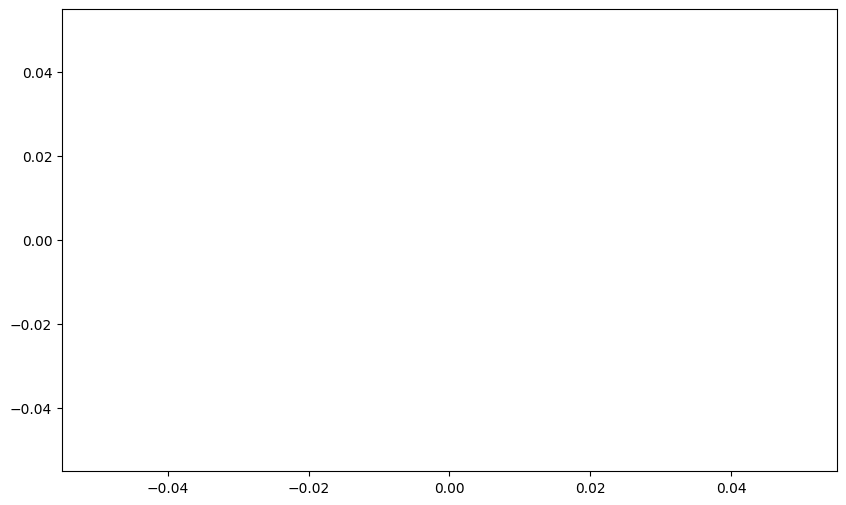

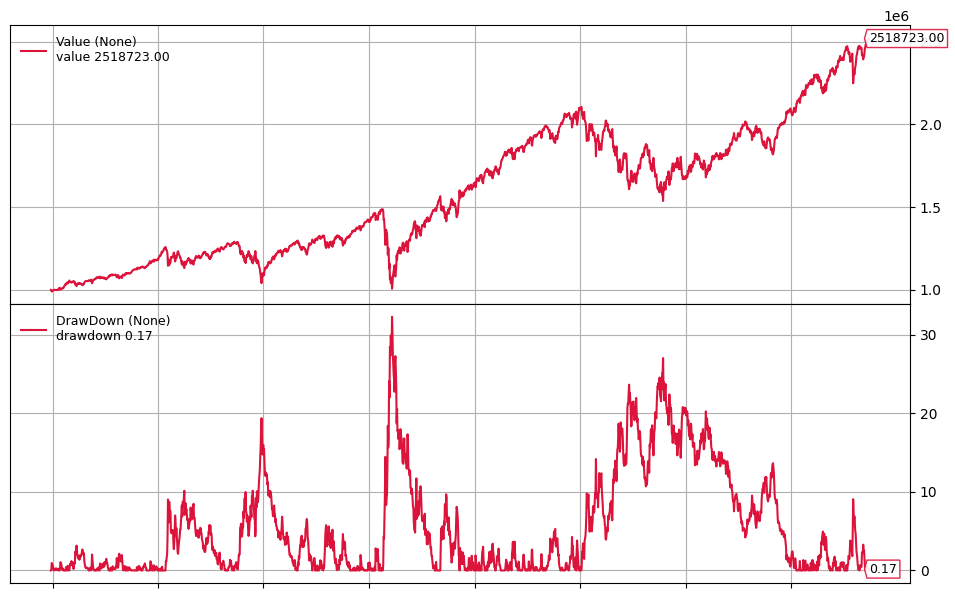

[*********************100%***********************]  1 of 1 completed

^HSI


'^HSI'

Timestamp('2013-01-02 00:00:00')

Timestamp('2024-09-27 00:00:00')

==> 1004 3028
backtest:  start=1004 - end=3028

BUY @ 1004 - close:23216.970703125, high:23226.919921875 - date:2017-02-03 00:00:00 - name:^HSI
backtest.plot: 1004-3028


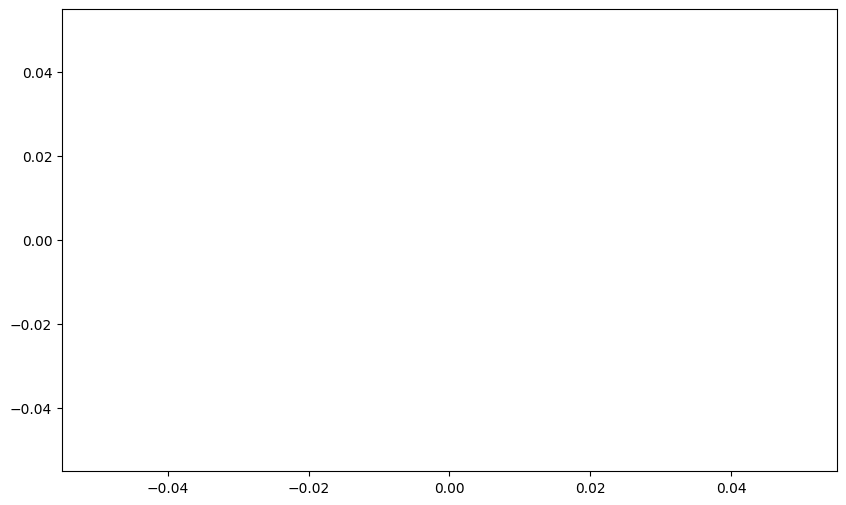

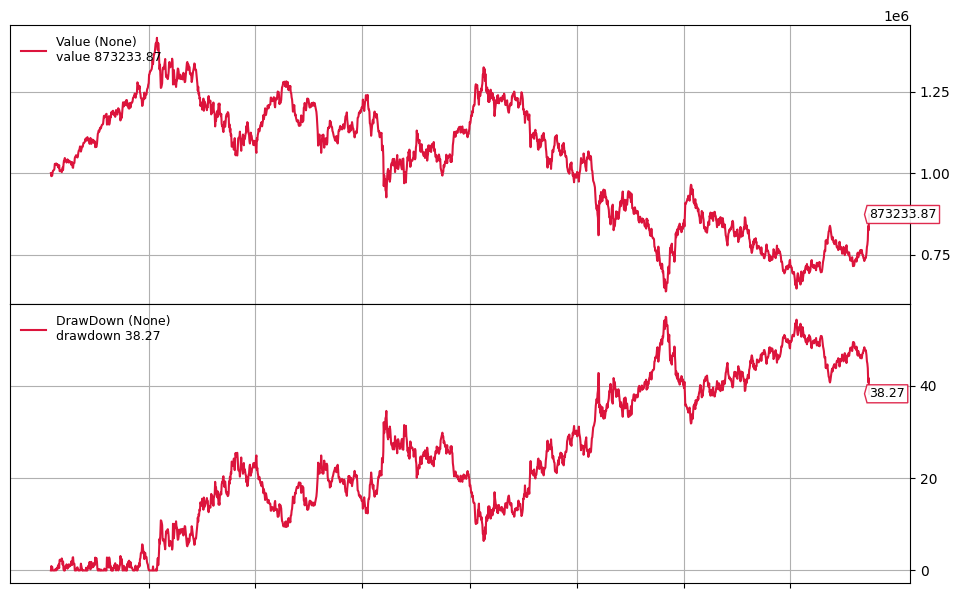

QQQ


[*********************100%***********************]  1 of 1 completed


'QQQ'

Timestamp('2013-01-02 00:00:00')

Timestamp('2024-09-27 00:00:00')

==> 1004 3028
backtest:  start=1004 - end=3028

BUY @ 1004 - close:120.45999908447266, high:121.5199966430664 - date:2016-12-27 00:00:00 - name:QQQ
backtest.plot: 1004-3028


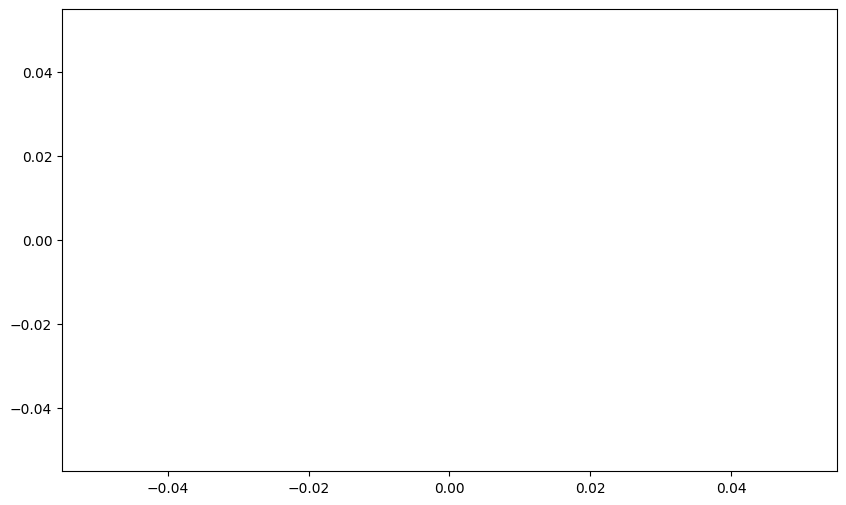

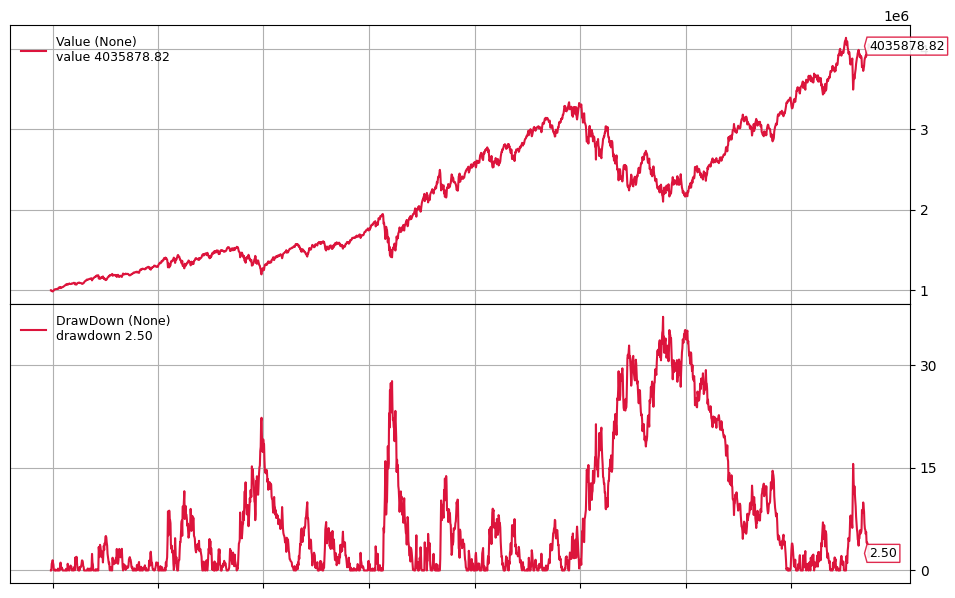

In [23]:
for sym in bm_list:
    benchmark_results[sym] = Backtest_BenchMark(sym)


In [24]:
display(start_test, end_test, benchmark_results )

1004

3028

{'SPY': <__main__.BuyAndHold at 0x7f66495fab10>,
 '^HSI': <__main__.BuyAndHold at 0x7f66480b7350>,
 'QQQ': <__main__.BuyAndHold at 0x7f66406f31d0>}

In [25]:
def RetreiveStats(bt_result, rm, obj, r_int):
    dd = bt_result.analyzers.drawdown.get_analysis()['max']['drawdown']
    cagr= bt_result.analyzers.returns.get_analysis()['rnorm100']
    sharpe =bt_result.analyzers.sharperatio.get_analysis()['sharperatio']

    return {'Risk_measure':rm, 'Objective':obj, 'R_Interval': r_int, 'Max DrawDown':dd/100.0, 'CAGR': cagr/100.0, 'Sharpe Ratio':sharpe}

In [26]:
#
# Retreive Daily Return from bt
#
def RetreiveDailyReturn(bt_result, s_name):
    tret_analyzer = bt_result.analyzers.getbyname('timereturn')
    ret_ = tret_analyzer.get_analysis()
    return pd.DataFrame(ret_.items(), columns=['Date', s_name])


In [27]:
BM_metric_list = []

for symbol in bm_list:
    print(symbol)
    BM_metric_list.append(RetreiveStats(benchmark_results[symbol], symbol, 'N/A', 'N/A'))
    BM_ret = RetreiveDailyReturn(benchmark_results[symbol], symbol)
    print(BM_ret)
    BM_ret.round(4).to_csv(f"{symbol}_ret.csv", index=False)


SPY
           Date       SPY
0    2013-01-02  0.000000
1    2013-01-03  0.000000
2    2013-01-04  0.000000
3    2013-01-07  0.000000
4    2013-01-08  0.000000
...         ...       ...
2950 2024-09-23  0.002634
2951 2024-09-24  0.001996
2952 2024-09-25  0.001154
2953 2024-09-26  0.005656
2954 2024-09-27 -0.001719

[2955 rows x 2 columns]
^HSI
           Date      ^HSI
0    2013-01-02  0.000000
1    2013-01-03  0.000000
2    2013-01-04  0.000000
3    2013-01-07  0.000000
4    2013-01-08  0.000000
...         ...       ...
2883 2024-09-23  0.009128
2884 2024-09-24  0.018109
2885 2024-09-25  0.053837
2886 2024-09-26 -0.014539
2887 2024-09-27  0.058236

[2888 rows x 2 columns]
QQQ
           Date       QQQ
0    2013-01-02  0.000000
1    2013-01-03  0.000000
2    2013-01-04  0.000000
3    2013-01-07  0.000000
4    2013-01-08  0.000000
...         ...       ...
2950 2024-09-23  0.000952
2951 2024-09-24  0.003123
2952 2024-09-25  0.000577
2953 2024-09-26  0.017781
2954 2024-09-27 -0.005810



In [28]:
display(BM_metric_list)

[{'Risk_measure': 'SPY',
  'Objective': 'N/A',
  'R_Interval': 'N/A',
  'Max DrawDown': 0.3228743946348118,
  'CAGR': 0.08196282546187791,
  'Sharpe Ratio': 0.605347150704247},
 {'Risk_measure': '^HSI',
  'Objective': 'N/A',
  'R_Interval': 'N/A',
  'Max DrawDown': 0.5494292603503544,
  'CAGR': -0.01175825798599421,
  'Sharpe Ratio': -0.024920167720875627},
 {'Risk_measure': 'QQQ',
  'Objective': 'N/A',
  'R_Interval': 'N/A',
  'Max DrawDown': 0.37031081594835447,
  'CAGR': 0.12635141897178034,
  'Sharpe Ratio': 0.6157275175540328}]

### Rebalancing Monthly, Quarterly, Semiannually using Riskfolio-Lib

In [29]:
rebalance_index = {}
rebalance_index["M"] = SelectIndex(returns, "M", start_test)
rebalance_index["Q"] = SelectIndex(returns, "Q", start_test)
rebalance_index["S"] = SelectIndex(returns, "S", start_test)


In [30]:
# def generate_interval(idx_list, fn):
#     ret = returns.reset_index()
#     df = ret.iloc[idx_list]['Date'].reset_index()
#     df.to_csv(fn, index=False)
#     return df.set_index('index')


r_index={}
r_index["M"] = generate_interval(returns, rebalance_index["M"], "rebalance_index_M.csv")
r_index["Q"] = generate_interval(returns, rebalance_index["Q"], "rebalance_index_Q.csv")
r_index["S"] = generate_interval(returns, rebalance_index["S"], "rebalance_index_S.csv")

# display(ret.iloc[rebalance_index["M"]]['Date'].reset_index())

In [31]:
r_index["S"]

,Date
index,
1030,2016-12-30 00:00:00+00:00
1158,2017-06-30 00:00:00+00:00
1287,2017-12-29 00:00:00+00:00
1415,2018-06-29 00:00:00+00:00
1545,2018-12-31 00:00:00+00:00
1672,2019-06-28 00:00:00+00:00
1803,2019-12-31 00:00:00+00:00
1931,2020-06-30 00:00:00+00:00
2062,2020-12-31 00:00:00+00:00


In [32]:
def get_return_set(ret, s_i, e_i):
    # i_ret = ret.reset_index()
    i_ret = ret.iloc[s_i: e_i,:].dropna(axis=1)
    return i_ret

nY = get_return_set(returns, 40, 1040)
display(nY)

,0341.HK,0405.HK,0737.HK,1186.HK
Date,,,,
2013-02-27 00:00:00+00:00,-0.0085,0.0025,0.0120,0.0090
2013-02-28 00:00:00+00:00,-0.0022,0.0025,0.0095,0.0330
2013-03-01 00:00:00+00:00,-0.0108,-0.0024,0.0094,0.0086
2013-03-04 00:00:00+00:00,0.0022,0.0025,0.0023,-0.0232
2013-03-05 00:00:00+00:00,0.0109,-0.0024,0.0046,0.0100
...,...,...,...,...
2017-01-09 00:00:00+00:00,0.0058,-0.0048,0.0024,-0.0039
2017-01-10 00:00:00+00:00,0.0116,0.0048,0.0000,0.0039
2017-01-11 00:00:00+00:00,-0.0019,-0.0048,0.0000,0.0136


* The optimization is based on the returns of previous 1000 days from last date of each quarter, which is about 4 years

In [33]:
import multiprocessing
import time

def opt_worker(d_cnt, data):
    created = multiprocessing.Process()
    current = multiprocessing.current_process()
    print(f' running: {current.name}, {current._identity}\n created: {created.name}, {created._identity}\n')

    results=[]
    for i in range(len(data)):
        obj, r, rm = data[i]['keys']
        print(f'started for {obj}, {r}, {rm} == {i}/{d_cnt} {current.name}\n')

        result={}
        result['keys'] = data[i]['keys']
        
        start_time = time.time()
        weights = pd.DataFrame(columns=returns.columns.to_list())
        # for j in rebalance_index[r]:
        for j, dt in r_index[r].iterrows():

            try:
                # Y = returns.iloc[j-test_size:j,:] # taking last 4 years (250 trading days per year)
                Y = get_return_set(returns, j-test_size, j)
                orig_size = len(Y.columns.to_list())
                # filter holidays i.e. all ticker has no data at 'all'
                # Y = Y.dropna(axis=0, how='all')
                # then filter out ticker that cannot supply full data set
                # Y = Y.dropna(axis=1, how='any')
                aSet = Y.columns.to_list()
                col_num = len(Y.columns.to_list())
               
                # Building the portfolio object
                print(f'Create Port: {obj}, {r}, {rm} == {i}/{d_cnt} {current.name}, Y cols={col_num}/{orig_size}\n')
                port = rp.Portfolio(returns=Y)
                
                port.alpha = 0.05
                model='BL' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
                hist = False # Use historical scenarios for risk measures that depend on scenarios
                rf = 0 # Risk free rate
                l = 0 # Risk aversion factor, only useful when obj is 'Utility'
                
                # Add portfolio constraints
                if useView:
                    P,Q = get_Views(aSet)
                if useConstraint:
                    A, B = get_Constraint(aSet)
                    port.ainequality = A
                    port.binequality = B
                
                # Calculating optimum portfolio
                
                # Select method and estimate input parameters:
                
                method_mu='hist' # Method to estimate expected returns based on historical data.
                method_cov='hist' # Method to estimate covariance matrix based on historical data.
                
                # print(f'assets_stats: {obj}, {r}, {rm} == {i}/{d_cnt} {current.name}\n')
                port.assets_stats(method_mu=method_mu, method_cov=method_cov)
                
                # Estimate optimal portfolio:
                # print(f'optimization(Classic): {obj}, {r}, {rm} == {i}/{d_cnt} {current.name}\n')
                out_w = port.optimization(model='Classic', rm=rm, obj=obj, rf=rf, l=l, hist=True)
                print(f"opt result for {obj}, {r}, {rm} == {i}/{d_cnt} {current.name}--out_w: {len(out_w)}:{out_w}\n")
                w = out_w
                
                # # Estimate Black Litterman inputs:
                # print(f'blacklitterman_stats: {obj}, {r}, {rm} == {i}/{len(data)} {current.name}\n')
                # port.blacklitterman_stats(P, Q/252, rf=rf, w=w, delta=None, eq=True)
                
                # if rm == 'MV':
                #     hist = False
                # else:
                #     hist = True
                # print(f'optimization({model}): {obj}, {r}, {rm} == {i}/{len(data)} {current.name}\n')
                # w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
            except Exception as e:
                print(f'Exception:{e} -- {obj}, {r}, {rm} == {i}/{d_cnt} {current.name}\n')
                w = None
            
            if w is None:
                w = weights.tail(1).T
            weights = pd.concat([weights, w.T], axis = 0)
     
        totalt = time.time()-start_time
        print(f"Finished for {obj}, {r}, {rm} == {i}/{d_cnt} {current.name}--{totalt} sec--\n")
        # if len(weights) == len(rebalance_index[r]):
        #     weights.index = rebalance_index[r]
        if len(weights) == len(r_index[r]):
            weights.index = r_index[r].index  
            weights.insert(0, 'Date', r_index[r]['Date'])
             
        result['weights'] = weights
        results.append(result) 
    print(f'Existing: {current.name}, {current._identity}\n')
    return results

In [34]:
def opt_workerv2(d_cnt, data):
    created = multiprocessing.Process()
    current = multiprocessing.current_process()
    print(f' running: {current.name}, {current._identity}\n created: {created.name}, {created._identity}\n')

    results=[]
    for i in range(len(data)):
        obj, r, rm = data[i]['keys']
        print(f'started for {obj}, {r}, {rm} == {i}/{d_cnt} {current.name}\n')

        result={}
        result['keys'] = data[i]['keys']
        
        start_time = time.time()
        weights = pd.DataFrame(columns=["index","Date"] + returns.columns.to_list())
        datasets = []
        result['datasets'] = datasets
        count=0
        for j, dt in r_index[r].iterrows():
            dataset = {}
            dataset['data_block'] = (j-test_size, j, dt['Date'])

            try:
                orig_size = len(returns.columns.to_list())            
                Y = get_return_set(returns, j-test_size, j)
                aSet = Y.columns.to_list()
                col_num = len(Y.columns.to_list())
               
                # Building the portfolio object
                # print(f'Create Port[{j}]: {obj}, {r}, {rm} == {i}/{d_cnt} {current.name}, Y cols={col_num}/{orig_size}\n')
                port = rp.Portfolio(returns=Y)
                dataset['data_size'] = Y.shape
                dataset['data_asset'] = Y.columns.to_list()
                dataset['assets_ratio'] = (orig_size, col_num)
                
                port.alpha = 0.05
                model='BL' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
                hist = False # Use historical scenarios for risk measures that depend on scenarios
                rf = 0 # Risk free rate
                l = 0 # Risk aversion factor, only useful when obj is 'Utility'
                
                # Add portfolio constraints
                if useView:
                    P,Q = get_Views(aSet)
                if useConstraint:
                    A, B = get_Constraint(aSet)
                    # print(f'==> Port Constraint[{j}]: {obj}, {r}, {rm} == A:{A.shape},B:{B.shape}, Y cols={col_num}/{orig_size}\n')
                    port.ainequality = A
                    port.binequality = B
                
                # Calculating optimum portfolio
                
                # Select method and estimate input parameters:
                
                method_mu='hist' # Method to estimate expected returns based on historical data.
                method_cov='hist' # Method to estimate covariance matrix based on historical data.
                
                # print(f'assets_stats: {obj}, {r}, {rm} == {i}/{d_cnt} {current.name}\n')
                port.assets_stats(method_mu=method_mu, method_cov=method_cov)
                
                # Estimate optimal portfolio:
                # print(f'optimization(Classic): {obj}, {r}, {rm} == {i}/{d_cnt} {current.name}\n')
                w = port.optimization(model='Classic', rm=rm, obj=obj, rf=rf, l=l, hist=True)
                # print(f"opt result for {obj}, {r}, {rm} == {i}/{d_cnt} {current.name}--out_w=:\n{w}\n")
            except Exception as e:
                print(f'Exception[{j}]:{e} -- {obj}, {r}, {rm} == {i}/{d_cnt} {current.name}\n')
                w = None
            
            if (w is None) and (len(weights)>0):
                w = weights.tail(1)
                if "index" in w.columns.to_list():
                    w.drop(columns=["index"], inplace=True)
                if "Date" in w.columns.to_list():
                    w.drop(columns=["Date"], inplace=True)
                w = w.T            
            count +=1
            if (w is not None) and (len(w)>0):
                dataset['w_asset'] = w.columns.to_list()
                wT = w.T
                wT.insert(0, "Date", [dt.Date])
                wT.insert(0, "index", [j])
                # display(weights)
                # display(wT)
                weights = pd.concat([weights, wT], axis = 0)
                # display(weights)
                # print(f"*** [{j}] {obj}, {r}, {rm} == weights.size:{weights.shape[0]}/{count}/{len(r_index[r])}    {current.name}\n")
            datasets.append(dataset)
        totalt = time.time()-start_time
        # print(f"Finished for {obj}, {r}, {rm} == {i}/{d_cnt} {current.name}--{totalt} sec--\n")
        # display(weights)
        weights = weights.set_index("index")
        if len(weights) != len(r_index[r]):    
            lw = len(weights)
            lr = len(r_index[r])
            print(f"*** [{j}] {obj}, {r}, {rm} == weights.len/r_index.len   {lw}/{lr}    {current.name}\n")
            
        result['weights'] = weights
        results.append(result) 
    print(f'Existing: {current.name}, {current._identity}\n')
    return results

In [35]:
##
# Generate a list of parameters for the multi-processing optimization function
##

models = {}
data_chunks = []
for obj in objectives:
    models[obj] = {}
    for r in reb_interval:
        models[obj][r] = {}
        for rm in rms:
            print(obj, ",", r, ",", rm)
            weights = pd.DataFrame([])
            data_chunks.append({"keys":(obj, r, rm)})

display(data_chunks)

Sharpe , Q , MV
Sharpe , Q , WR
Sharpe , Q , CVaR
MinRisk , Q , MV
MinRisk , Q , WR
MinRisk , Q , CVaR
MaxRet , Q , MV
MaxRet , Q , WR
MaxRet , Q , CVaR


[{'keys': ('Sharpe', 'Q', 'MV')},
 {'keys': ('Sharpe', 'Q', 'WR')},
 {'keys': ('Sharpe', 'Q', 'CVaR')},
 {'keys': ('MinRisk', 'Q', 'MV')},
 {'keys': ('MinRisk', 'Q', 'WR')},
 {'keys': ('MinRisk', 'Q', 'CVaR')},
 {'keys': ('MaxRet', 'Q', 'MV')},
 {'keys': ('MaxRet', 'Q', 'WR')},
 {'keys': ('MaxRet', 'Q', 'CVaR')}]

In [36]:
import random

random.shuffle(data_chunks)
display(data_chunks)

[{'keys': ('MinRisk', 'Q', 'MV')},
 {'keys': ('Sharpe', 'Q', 'CVaR')},
 {'keys': ('MinRisk', 'Q', 'WR')},
 {'keys': ('MaxRet', 'Q', 'WR')},
 {'keys': ('MinRisk', 'Q', 'CVaR')},
 {'keys': ('Sharpe', 'Q', 'MV')},
 {'keys': ('MaxRet', 'Q', 'CVaR')},
 {'keys': ('Sharpe', 'Q', 'WR')},
 {'keys': ('MaxRet', 'Q', 'MV')}]

In [37]:
%%time

from data_processing_v2 import run_pool_v2, set_debug

set_debug(True)

# Run with a specified number of CPUs

opt_resultsv2 = run_pool_v2(data_chunks, opt_workerv2)


MP> set new dbug flag: True
MP> num_cpus is 15
MP> split_data: chunk_size:1 from data.length=9
MP> running: Process-1, (1,)
 created: Process-1:1, (1, 1)

MP> running: Process-2, (2,)
 created: Process-2:1, (2, 1)

MP> running: Process-3, (3,)
 created: Process-3:1, (3, 1)

MP> running: Process-4, (4,)
 created: Process-4:1, (4, 1)

MP> running: Process-5, (5,)
 created: Process-5:1, (5, 1)

MP> running: Process-6, (6,)
 created: Process-6:1, (6, 1)

MP> running: Process-7, (7,)
 created: Process-7:1, (7, 1)

MP> running: Process-8, (8,)
 created: Process-8:1, (8, 1)

MP> running: Process-9, (9,)
 created: Process-9:1, (9, 1)

MP> running: Process-10, (10,)
 created: Process-10:1, (10, 1)

MP> running: Process-11, (11,)
 created: Process-11:1, (11, 1)

MP> running: Process-12, (12,)
 created: Process-12:1, (12, 1)

MP> running: Process-13, (13,)
 created: Process-13:1, (13, 1)

MP> running: Process-14, (14,)
 created: Process-14:1, (14, 1)

 running: Process-2, (2,)
 created: Process-2

In [38]:
display(f"Optimized result length: {len(opt_resultsv2)}")
models = []
for batch in opt_resultsv2:
    for result in batch:
        obj,r,rm = result['keys']
        # w = result['weights'].fillna(0)
        w = result['weights']
        print(obj,r,rm)
        # print('w.shape: ', w.shape)
        print(returns.isna().sum())
        # print(w.columns[w.isna().sum()==w.shape[0]])      
        w.round(4).to_csv(f"weights_{obj}_{r}_{rm}.csv")
        model = {'keys': result['keys'], 'weights': w}
        models.append(model)
        
display(len(models))

'Optimized result length: 9'

MinRisk Q MV
0341.HK             1
0405.HK             1
0737.HK             1
1186.HK             1
1810.HK          1422
3175.HK           856
3187.HK          2008
9988.HK          1780
0P0001Q45W.HK    2608
dtype: int64
MaxRet Q WR
0341.HK             1
0405.HK             1
0737.HK             1
1186.HK             1
1810.HK          1422
3175.HK           856
3187.HK          2008
9988.HK          1780
0P0001Q45W.HK    2608
dtype: int64
MaxRet Q MV
0341.HK             1
0405.HK             1
0737.HK             1
1186.HK             1
1810.HK          1422
3175.HK           856
3187.HK          2008
9988.HK          1780
0P0001Q45W.HK    2608
dtype: int64
MaxRet Q CVaR
0341.HK             1
0405.HK             1
0737.HK             1
1186.HK             1
1810.HK          1422
3175.HK           856
3187.HK          2008
9988.HK          1780
0P0001Q45W.HK    2608
dtype: int64
Sharpe Q MV
0341.HK             1
0405.HK             1
0737.HK             1
1186.HK             1
1810.

9

In [39]:
#
# create parameters list for process pool
#
# target = ('MaxRet','S','WR')
target=None
parameters=[]
for arg in models:
    if (target is None) or (arg['keys'] == target):
        param={}
        param['keys'] = arg['keys']
        display(param['keys'])
        param['weights'] = arg['weights'].round(4)
        display(param['weights'])
        parameters.append(param)

('MinRisk', 'Q', 'MV')

,Date,0341.HK,0405.HK,0737.HK,1186.HK,1810.HK,3175.HK,3187.HK,9988.HK,0P0001Q45W.HK
index,,,,,,,,,,
1030,2016-12-30 00:00:00+00:00,0.2500,0.2500,0.25,0.2500,NaN,NaN,NaN,NaN,NaN
1094,2017-03-31 00:00:00+00:00,0.2500,0.2500,0.25,0.2500,NaN,NaN,NaN,NaN,NaN
1158,2017-06-30 00:00:00+00:00,0.2500,0.2500,0.25,0.2500,NaN,NaN,NaN,NaN,NaN
1223,2017-09-29 00:00:00+00:00,0.2500,0.2500,0.25,0.2500,NaN,NaN,NaN,NaN,NaN
1287,2017-12-29 00:00:00+00:00,0.2500,0.2500,0.25,0.2500,NaN,NaN,NaN,NaN,NaN
1350,2018-03-29 00:00:00+00:00,0.2500,0.2500,0.25,0.2500,NaN,NaN,NaN,NaN,NaN
1415,2018-06-29 00:00:00+00:00,0.2500,0.2500,0.25,0.2500,NaN,NaN,NaN,NaN,NaN
1480,2018-09-28 00:00:00+00:00,0.2500,0.2500,0.25,0.2500,NaN,NaN,NaN,NaN,NaN
1545,2018-12-31 00:00:00+00:00,0.2500,0.2500,0.25,0.2500,NaN,NaN,NaN,NaN,NaN


('MaxRet', 'Q', 'WR')

,Date,0341.HK,0405.HK,0737.HK,1186.HK,1810.HK,3175.HK,3187.HK,9988.HK,0P0001Q45W.HK
index,,,,,,,,,,
1030,2016-12-30 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1094,2017-03-31 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1158,2017-06-30 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1223,2017-09-29 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1287,2017-12-29 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1350,2018-03-29 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1415,2018-06-29 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1480,2018-09-28 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1545,2018-12-31 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN


('MaxRet', 'Q', 'MV')

,Date,0341.HK,0405.HK,0737.HK,1186.HK,1810.HK,3175.HK,3187.HK,9988.HK,0P0001Q45W.HK
index,,,,,,,,,,
1030,2016-12-30 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1094,2017-03-31 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1158,2017-06-30 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1223,2017-09-29 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1287,2017-12-29 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1350,2018-03-29 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1415,2018-06-29 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1480,2018-09-28 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1545,2018-12-31 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN


('MaxRet', 'Q', 'CVaR')

,Date,0341.HK,0405.HK,0737.HK,1186.HK,1810.HK,3175.HK,3187.HK,9988.HK,0P0001Q45W.HK
index,,,,,,,,,,
1030,2016-12-30 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1094,2017-03-31 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1158,2017-06-30 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1223,2017-09-29 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1287,2017-12-29 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1350,2018-03-29 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1415,2018-06-29 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1480,2018-09-28 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1545,2018-12-31 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN


('Sharpe', 'Q', 'MV')

,Date,0341.HK,0405.HK,0737.HK,1186.HK,1810.HK,3175.HK,3187.HK,9988.HK,0P0001Q45W.HK
index,,,,,,,,,,
1030,2016-12-30 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1094,2017-03-31 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1158,2017-06-30 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1223,2017-09-29 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1287,2017-12-29 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1350,2018-03-29 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1415,2018-06-29 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1480,2018-09-28 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1545,2018-12-31 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN


('MinRisk', 'Q', 'WR')

,Date,0341.HK,0405.HK,0737.HK,1186.HK,1810.HK,3175.HK,3187.HK,9988.HK,0P0001Q45W.HK
index,,,,,,,,,,
1030,2016-12-30 00:00:00+00:00,0.2500,0.2500,0.25,0.2500,NaN,NaN,NaN,NaN,NaN
1094,2017-03-31 00:00:00+00:00,0.2500,0.2500,0.25,0.2500,NaN,NaN,NaN,NaN,NaN
1158,2017-06-30 00:00:00+00:00,0.2500,0.2500,0.25,0.2500,NaN,NaN,NaN,NaN,NaN
1223,2017-09-29 00:00:00+00:00,0.2500,0.2500,0.25,0.2500,NaN,NaN,NaN,NaN,NaN
1287,2017-12-29 00:00:00+00:00,0.2500,0.2500,0.25,0.2500,NaN,NaN,NaN,NaN,NaN
1350,2018-03-29 00:00:00+00:00,0.2500,0.2500,0.25,0.2500,NaN,NaN,NaN,NaN,NaN
1415,2018-06-29 00:00:00+00:00,0.2500,0.2500,0.25,0.2500,NaN,NaN,NaN,NaN,NaN
1480,2018-09-28 00:00:00+00:00,0.2500,0.2500,0.25,0.2500,NaN,NaN,NaN,NaN,NaN
1545,2018-12-31 00:00:00+00:00,0.2500,0.2500,0.25,0.2500,NaN,NaN,NaN,NaN,NaN


('Sharpe', 'Q', 'WR')

,Date,0341.HK,0405.HK,0737.HK,1186.HK,1810.HK,3175.HK,3187.HK,9988.HK,0P0001Q45W.HK
index,,,,,,,,,,
1030,2016-12-30 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1094,2017-03-31 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1158,2017-06-30 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1223,2017-09-29 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1287,2017-12-29 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1350,2018-03-29 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1415,2018-06-29 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1480,2018-09-28 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1545,2018-12-31 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN


('MinRisk', 'Q', 'CVaR')

,Date,0341.HK,0405.HK,0737.HK,1186.HK,1810.HK,3175.HK,3187.HK,9988.HK,0P0001Q45W.HK
index,,,,,,,,,,
1030,2016-12-30 00:00:00+00:00,0.2500,0.2500,0.2500,0.2500,NaN,NaN,NaN,NaN,NaN
1094,2017-03-31 00:00:00+00:00,0.2500,0.2500,0.2500,0.2500,NaN,NaN,NaN,NaN,NaN
1158,2017-06-30 00:00:00+00:00,0.2500,0.2500,0.2500,0.2500,NaN,NaN,NaN,NaN,NaN
1223,2017-09-29 00:00:00+00:00,0.2500,0.2500,0.2500,0.2500,NaN,NaN,NaN,NaN,NaN
1287,2017-12-29 00:00:00+00:00,0.2500,0.2500,0.2500,0.2500,NaN,NaN,NaN,NaN,NaN
1350,2018-03-29 00:00:00+00:00,0.2500,0.2500,0.2500,0.2500,NaN,NaN,NaN,NaN,NaN
1415,2018-06-29 00:00:00+00:00,0.2500,0.2500,0.2500,0.2500,NaN,NaN,NaN,NaN,NaN
1480,2018-09-28 00:00:00+00:00,0.2500,0.2500,0.2500,0.2500,NaN,NaN,NaN,NaN,NaN
1545,2018-12-31 00:00:00+00:00,0.2500,0.2500,0.2500,0.2500,NaN,NaN,NaN,NaN,NaN


('Sharpe', 'Q', 'CVaR')

,Date,0341.HK,0405.HK,0737.HK,1186.HK,1810.HK,3175.HK,3187.HK,9988.HK,0P0001Q45W.HK
index,,,,,,,,,,
1030,2016-12-30 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1094,2017-03-31 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1158,2017-06-30 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1223,2017-09-29 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1287,2017-12-29 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1350,2018-03-29 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1415,2018-06-29 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1480,2018-09-28 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN
1545,2018-12-31 00:00:00+00:00,0.25,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN


In [40]:
parameters

[{'keys': ('MinRisk', 'Q', 'MV'),
  'weights':                            Date  0341.HK  0405.HK  0737.HK  1186.HK  1810.HK  \
  index                                                                          
  1030  2016-12-30 00:00:00+00:00   0.2500   0.2500     0.25   0.2500      NaN   
  1094  2017-03-31 00:00:00+00:00   0.2500   0.2500     0.25   0.2500      NaN   
  1158  2017-06-30 00:00:00+00:00   0.2500   0.2500     0.25   0.2500      NaN   
  1223  2017-09-29 00:00:00+00:00   0.2500   0.2500     0.25   0.2500      NaN   
  1287  2017-12-29 00:00:00+00:00   0.2500   0.2500     0.25   0.2500      NaN   
  1350  2018-03-29 00:00:00+00:00   0.2500   0.2500     0.25   0.2500      NaN   
  1415  2018-06-29 00:00:00+00:00   0.2500   0.2500     0.25   0.2500      NaN   
  1480  2018-09-28 00:00:00+00:00   0.2500   0.2500     0.25   0.2500      NaN   
  1545  2018-12-31 00:00:00+00:00   0.2500   0.2500     0.25   0.2500      NaN   
  1608  2019-03-29 00:00:00+00:00   0.2500   0.2500  

In [41]:
############################################################
# Building the Asset Allocation Class
############################################################

class AssetAllocation(bt.Strategy):

    def log(self, txt, dt=None):
        dt = dt or self.data.datetime[0]
        dt = bt.num2date(dt)
        print('\n{}: {}'.format(dt.isoformat(), txt))

    def __init__(self, **kwargs):
        self._n_assets = len(self.datas)
        self._weights = None
        self._assets = None
        self._data_key = "N/A"
        self.counter = 0
        print(f"length of datas: {self._n_assets}")
        
        for key, value in kwargs.items():
            print(f"init(key: {key})")
            if key=="data_keys":
                self._data_key = value
                
            if key=="assets":
                self._assets = value
                l_assets = len(self._assets)
                print(f"init({self._data_key}) _assets({l_assets}): {self._assets}")
                for i in range(self._n_assets):
                    _n = self.datas[i]._name
                    if _n in self._assets:
                        print(f"init>> assets[{i}]-{_n} in weights")
                        setattr(self, _n, self.datas[i])

            if key=="weights":
                self._weights = value
                w_names = self._weights.columns.to_list()
                l_assets = len(self._assets)
                l_weights = len(self._weights)
                print(f"init(weights, key={self._data_key}).names({l_weights}):  {w_names}")
                print(f"l_assets:{l_assets} == l_weights:{l_weights} : ", l_assets==l_weights)

            if key=='dt_index':
                self._dt_index = value
                print(f"set dt_index: length={len(self._dt_index )}")

    def notify_order(self, order):
        if order.status in [bt.Order.Submitted, bt.Order.Accepted]:
            return  # Await further notifications

        if order.status == order.Completed:
            if order.isbuy():
                self.log('BUY COMPLETE, {:.2f}'.format(order.executed.price))
            else:
                selltxt = 'SELL COMPLETE, {:.2f}'.format(order.executed.price)
                self.log(selltxt, order.executed.dt)
        elif order.status in [order.Expired, order.Canceled, order.Margin]:
            self.log('Order Status: {} '.format(order.Status[order.status]))
            pass  # Simply log

        # Allow new orders
        self.orderid = None
         
    def next(self):
        if self.counter in self._weights.index.tolist():
            wght = self._weights.loc[self.counter,:].dropna()
            dt = self._dt_index.loc[self.counter].Date
            ww = wght
            if ww is not None:
                ww = ww.T
            print(f"next({self.counter}).Date({dt})--> wght  is:\n {ww}")
            for i,w in wght.items():
                # print(f"==> Target.order.perc:--> {self.counter},{i},{w}")
                self.order_target_percent(getattr(self, i), target=w)
        self.counter += 1

In [42]:
assets_prices_names=[]
for i in range(len(assets_prices)):
    assets_prices_names.append(assets_prices[i]['name'])
print("length:", len(assets_prices_names))
print(assets_prices_names)

length: 9
['0341.HK', '0405.HK', '0737.HK', '1186.HK', '1810.HK', '3175.HK', '3187.HK', '9988.HK', '0P0001Q45W.HK']


In [43]:
def bt_worker(d_cnt, data):
    created = multiprocessing.Process()
    current = multiprocessing.current_process()
    print(f' running: {current.name}, {current._identity}\n created: {created.name}, {created._identity}\n')    
    # aKey = data['keys']
    # print(f'bt_worker: data.length={len(data)}')
    results = []
    for i in range(len(data)):
        obj, r, rm = data[i]['keys']
        _weights = data[i]['weights'].drop(columns=['Date'])
        print("weights of ", data[i]['keys'])
        display(_weights)
        w_n = _weights.columns.to_list()
        _assets = assets_prices_names
        print(f"bt_worker: {obj},{r},{rm} == weight.length:{len(_weights)},,{w_n}  {current.name}\n")
        
        start_time = time.time()
        print(f'bt_worker: {obj},{r},{rm} == {i}/{d_cnt} {current.name}\n')
        result={}
        result['keys'] = (obj,r,rm)

        if len(_weights) > 0:
            result0 = backtest(assets_prices,
                            AssetAllocation,
                            start=start_test,
                            end=end_test,
                            plot=plotFlag,
                            assets=_assets,
                            weights=_weights,
                            dt_index = r_index[r],
                            data_keys=data[i]['keys']
                            )     
        
            result['metric'] = RetreiveStats(result0, rm, obj, r)
            result['Dret'] = RetreiveDailyReturn(result0, 'Return')
            result['ptr'] = result0
        else:
            result['metric'] = None
            result['Dret'] = None
            
        result['w'] = _weights
        totalt = time.time()-start_time
        result['timestamp'] = f"--{totalt}--"

        results.append(result)
    return results

In [ ]:
%%time

# Run with a specified number of CPUs

bt_results = run_pool_v2(parameters, bt_worker)


In [83]:
# weights = np.random.uniform(0, 0.3, size=(returns.shape))
# weights = weights / weights.sum(axis=1, keepdims=True)
# display(weights.shape)

In [115]:
w = parameters[0]['weights']
display(w)

,Date,0341.HK,0405.HK,0737.HK,1186.HK,1810.HK,3175.HK,3187.HK,9988.HK,0P0001Q45W.HK
index,,,,,,,,,,
1030,2016-12-30 00:00:00+00:00,0.2500,0.2500,0.25,0.2500,NaN,NaN,NaN,NaN,NaN
1094,2017-03-31 00:00:00+00:00,0.2500,0.2500,0.25,0.2500,NaN,NaN,NaN,NaN,NaN
1158,2017-06-30 00:00:00+00:00,0.2500,0.2500,0.25,0.2500,NaN,NaN,NaN,NaN,NaN
1223,2017-09-29 00:00:00+00:00,0.2500,0.2500,0.25,0.2500,NaN,NaN,NaN,NaN,NaN
1287,2017-12-29 00:00:00+00:00,0.2500,0.2500,0.25,0.2500,NaN,NaN,NaN,NaN,NaN
1350,2018-03-29 00:00:00+00:00,0.2500,0.2500,0.25,0.2500,NaN,NaN,NaN,NaN,NaN
1415,2018-06-29 00:00:00+00:00,0.2500,0.2500,0.25,0.2500,NaN,NaN,NaN,NaN,NaN
1480,2018-09-28 00:00:00+00:00,0.2500,0.2500,0.25,0.2500,NaN,NaN,NaN,NaN,NaN
1545,2018-12-31 00:00:00+00:00,0.2500,0.2500,0.25,0.2500,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Function to calculate CAGR
def calculate_cagr(df, start_date, end_date):
    total_days = (end_date - start_date).days
    total_years = total_days / 365.25
    cagr = (df['Port_Value'].iloc[-1] / df['Port_Value'].iloc[0]) ** (1 / total_years) - 1
    return cagr

# Function to calculate Sharpe Ratio
def calculate_sharpe_ratio(df, risk_free_rate=0.01):
    excess_return = df['Port_Return'] - risk_free_rate / 252
    sharpe_ratio = np.mean(excess_return) / np.std(excess_return) * np.sqrt(252)
    return sharpe_ratio

# Function to calculate Maximum Drawdown
def calculate_max_drawdown(df):
    cumulative_return = (1 + df['Port_Return']).cumprod()
    peak = cumulative_return.cummax()
    drawdown = (cumulative_return - peak) / peak
    max_drawdown = drawdown.min()
    return max_drawdown
	

In [114]:
def simplay_backtest(weights):
    w = parameters[0]['weights']
    # display(w)
    
    returns.reset_index()[['Date']]
    mdf = pd.merge(returns.reset_index()[['Date']], w, on='Date', how='left').fillna(method='ffill')
    display(mdf)
    weights = mdf.drop(columns=['Date']).to_numpy()
    display(weights.shape)
    display(weights)

    Portfolio = returns.reset_index().copy()
display(Portfolio)
assets = Portfolio.drop(columns=['Date']).columns.to_list()
display(assets)
    
    # Calculate portfolio daily returns
    Portfolio['Port_Return'] = (weights * Portfolio[assets]).sum(axis=1)
    
    # Calculate portfolio value assuming initial investment of $100,000
    initial_investment = 100000
    Portfolio['Port_Value'] = initial_investment * (1 + Portfolio['Port_Return']).cumprod()
    
    display(Portfolio)
    
    # Calculate CAGR
    start_date = Portfolio['Date'].iloc[0]
    end_date = Portfolio['Date'].iloc[-1]
    cagr = calculate_cagr(Portfolio, start_date, end_date)
    
    # Calculate Sharpe Ratio
    sharpe_ratio = calculate_sharpe_ratio(Portfolio)
    
    # Calculate Maximum Drawdown
    max_drawdown = calculate_max_drawdown(Portfolio)
    
    print(f"CAGR: {cagr:.2%}")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Maximum Drawdown: {max_drawdown:.2%}")
    
    
        

CAGR: -2.95%
Sharpe Ratio: -0.21
Maximum Drawdown: -54.68%


In [ ]:
def simply_bt_worker(d_cnt, data):
    created = multiprocessing.Process()
    current = multiprocessing.current_process()
    print(f' running: {current.name}, {current._identity}\n created: {created.name}, {created._identity}\n')    
    # aKey = data['keys']
    # print(f'bt_worker: data.length={len(data)}')
    results = []
    for i in range(len(data)):
        obj, r, rm = data[i]['keys']
        _weights = data[i]['weights'].drop(columns=['Date'])
        print("weights of ", data[i]['keys'])
        display(_weights)
        w_n = _weights.columns.to_list()
        _assets = assets_prices_names
        print(f"simply_bt_worker: {obj},{r},{rm} == weight.length:{len(_weights)},,{w_n}  {current.name}\n")
        
        start_time = time.time()
        print(f'simply_bt_worker: {obj},{r},{rm} == {i}/{d_cnt} {current.name}\n')
        result={}
        result['keys'] = (obj,r,rm)

        if len(_weights) > 0:
            result0 = backtest(assets_prices,
                            AssetAllocation,
                            start=start_test,
                            end=end_test,
                            plot=plotFlag,
                            assets=_assets,
                            weights=_weights,
                            dt_index = r_index[r],
                            data_keys=data[i]['keys']
                            )     
        
            result['metric'] = RetreiveStats(result0, rm, obj, r)
            result['Dret'] = RetreiveDailyReturn(result0, 'Return')
            result['ptr'] = result0
        else:
            result['metric'] = None
            result['Dret'] = None
            
        result['w'] = _weights
        totalt = time.time()-start_time
        result['timestamp'] = f"--{totalt}--"

        results.append(result)
    return results

In [ ]:
display(BM_metric_list)

In [ ]:
check_flag=True

print(f'bt_results.length = {len(bt_results)}')
metric_list=[]
for batches in bt_results:
    print(f'batches.length = {len(batches)}')
    for result in batches:
        print(f'bt_results.length = {len(bt_results)}')
        aKey = result['keys']
        print(aKey)
        obj, r, rm = aKey
        print(f'obj={obj},r={r},rm={rm}')
        if len(result['Dret']):
            # print(result['Dret'])
            r_fn = f"DailyRet_{obj}_{r}_{rm}.csv"
            result['Dret'].round(4).to_csv(r_fn, index=False)
            print(f"Daily return {r_fn} saved")
        if len(result['w']) > 0:
            w=result['w'].iloc[-1,:].dropna()
            # print(w)
            if check_flag:
                # We need matplotlib >= 3.3.0 to use this function
                ax = rp.plot_pie(w=w, title=f'{obj}-{rm}-{r}', others=0.05, nrow=25, cmap = "tab20",
                                height=6, width=10, ax=None)
                # w.plot.pie(subplots=True, figsize=(8, 8))
                plt.show()
            ############################################################
            # Composition per Industry
            ############################################################
            w_classes = pd.concat([asset_classes.set_index('Assets'), w], axis=1)
            # display(w_classes)
            w_classes = w_classes.groupby(['Sector']).sum()
            # w_classes.columns = ['weights']  
            # display(w_classes)
        if result['metric'] is not None:
            # display(result['metric'])
            metric_list.append(result['metric'])


In [ ]:
BM_metric_list_df = pd.DataFrame(BM_metric_list)
metric_df = pd.DataFrame(metric_list)
metric_df = metric_df.sort_values(by=['CAGR','Sharpe Ratio'], ascending=False)
full_metric = pd.concat([BM_metric_list_df, metric_df])
display(full_metric.head(15))

In [ ]:
full_metric.to_csv("Port_Metric.csv", index=False)
constraints.to_csv("Constraints.csv", index=False)

In [ ]:
display(metric_df[metric_df['R_Interval']=='Q'].sort_values(by=['Sharpe Ratio','CAGR'], ascending=False))

In [ ]:
display(metric_df[metric_df['R_Interval']=='S'].sort_values(by=['Sharpe Ratio','CAGR'], ascending=False))